In [3]:
%matplotlib inline

import xarray as xr
import intake
import numpy as np
import matplotlib.pyplot as plt
# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 
import pylab as plt
# %matplotlib inline 
# from mpl_toolkits import basemap
import scipy.io
import math
import mpl_toolkits as basemap
%matplotlib inline
%pylab inline
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Start a Cluster on Cheyenne’s Casper nodes
# “This asks for 2 nodes of 120GB of memory with 6 processes each. Thus, we get 12 workers with 6 cores and 20GB of memory.”
from dask_jobqueue import SLURMCluster
NUMNODES=2
cluster = SLURMCluster(cores=36, memory='120 GB',project='NCGD0011', processes=6, walltime='02:00:00')
cluster.scale(NUMNODES*4)

In [5]:
from dask.distributed import Client
client = Client(cluster)

In [6]:
client

Client Scheduler: tcp://128.117.181.208:44435 Dashboard: http://128.117.181.208:38969/status,Cluster Workers: 12 Cores: 72 Memory: 240.00 GB


In [7]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("/glade/u/home/pmongwe/cmip6hack-ocean-bgc/catalogs/pangeo-cmip6.json")
# col

In [8]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,day,pr,gn,NaN,v20190702,20150101-20551231,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Omon,vmo,gn,NaN,v20190624,205501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,hfls,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,prsn,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,va,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...


In [9]:
pwd

'/glade/u/home/pmongwe/cmip6hack-ocean-bgc/notebooks'

In [14]:
# import pprint 
# uni_dict = col.unique(['experiment_id', 'table_id'])
# pprint.pprint(uni_dict, compact=True)

In [9]:
cat = col.search(experiment_id='historical', table_id='Omon', grid_label='gn') #member_id ='r1i1p1f1'
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
19598,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r3i1p1f2,Omon,tauuo,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
19599,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r3i1p1f2,Omon,tos,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
19601,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r3i1p1f2,Omon,htovgyre,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
19602,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r3i1p1f2,Omon,htovovrt,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
19603,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r3i1p1f2,Omon,hfbasinpmadv,gn,NaN,v20190125,185001-201412,/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFAC...
...,...,...,...,...,...,...,...,...,...,...,...,...
587678,CMIP,NCC,NorESM2-LM,historical,r3i1p1f1,Omon,umo,gn,NaN,v20190920,191001-191912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
587679,CMIP,NCC,NorESM2-LM,historical,r3i1p1f1,Omon,umo,gn,NaN,v20190920,190001-190912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
587680,CMIP,NCC,NorESM2-LM,historical,r3i1p1f1,Omon,umo,gn,NaN,v20190920,185001-185912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
587681,CMIP,NCC,NorESM2-LM,historical,r3i1p1f1,Omon,umo,gn,NaN,v20190920,188001-188912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...


In [11]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
# pprint.pprint(uni_dict, compact=True)

In [12]:
models = set(uni_dict['source_id']['values']) # all the models

for variable_id in ['fgo2', 'fgco2']: #'tos','fgco2abio','fgco2nat','tos','sos','hfds'
    query = dict(variable_id=variable_id, experiment_id = 'historical', table_id='Omon', 
              grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['MIROC-ES2L',
 'CanESM5',
 'NorESM2-LM',
 'IPSL-CM6A-LR',
 'NorCPM1',
 'CNRM-ESM2-1']

In [18]:
# cat.to_dataset_dict?

In [13]:
variables = ['fgo2', 'fgco2','tos','sos','spco2','areacello'] #'spco2','spco2abio',
cat = col.search(variable_id= variables,experiment_id='historical', table_id=['Omon','Ofx'], 
                      grid_label='gn', source_id=models) #,'hfds' #, member_id='r1i1p1f1'
# cat.to_dataset_dict()

In [14]:
variables = ['fgo2', 'fgco2','tos','sos','spco2','areacello'] #'spco2','spco2abio',
dsets = {}
for variable in variables:
    cat = col.search(variable_id= variable,experiment_id='historical', table_id=['Omon','Ofx'], 
                      grid_label='gn', source_id=models) #,'hfds' #, member_id='r1i1p1f1'
    dsets[variable] = cat.to_dataset_dict()
# dsets


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 6 group(s)

xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 6 group(s)

xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are 

In [17]:
dsets['areacello'].keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Ofx.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn', 'CMIP.MIROC.MIROC-ES2L.historical.Ofx.gn', 'CMIP.NCC.NorESM2-LM.historical.Ofx.gn'])

In [18]:
lat_dict = {
    'CMIP.CCCma.CanESM5.historical.Omon.gn': 'latitude',
    'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn': 'nav_lat',
    'CMIP.NCC.NorESM2-LM.historical.Omon.gn': 'latitude',
    'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn': 'lat',
    'CMIP.MIROC.MIROC-ES2L.historical.Omon.gn': 'latitude'
}

lat_dict_area = {
    'CMIP.CCCma.CanESM5.historical.Ofx.gn': 'latitude',
    'CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn': 'nav_lat',
    'CMIP.NCC.NorESM2-LM.historical.Ofx.gn': 'latitude',
    'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn':'lat',
    'CMIP.MIROC.MIROC-ES2L.historical.Ofx.gn': 'latitude'
}

In [27]:
# dsets['areacello']['CMIP.MIROC.MIROC-ES2L.historical.Ofx.gn']

In [113]:
## mol m-2 s-1 flux of O2 units
## kg m-2 s-1 flux of CO2 units 

In [19]:
for k, v in dsets['spco2'].items():
#     ds = dsets[k]
#     SO_slice = ds.where(ds[v] <= -44, drop=True).squeeze()
    print(k)

CMIP.CCCma.CanESM5.historical.Omon.gn
CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn
CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn
CMIP.MIROC.MIROC-ES2L.historical.Omon.gn
CMIP.NCC.NorCPM1.historical.Omon.gn
CMIP.NCC.NorESM2-LM.historical.Omon.gn


In [20]:
#### sample of South of 44oS 
SO_slice_fgco2 = {}
for k, v in lat_dict.items():
    ds = dsets['fgco2'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_fgco2[k] = SO_slice_i
    
SO_slice_fgo2 = {}
for k, v in lat_dict.items():
    ds = dsets['fgo2'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_fgo2[k] = SO_slice_i

SO_slice_spco2 = {}
for k, v in lat_dict.items():
    ds = dsets['spco2'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_spco2[k] = SO_slice_i
    
SO_slice_tos = {}
for k, v in lat_dict.items():
    ds = dsets['tos'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_tos[k] = SO_slice_i

SO_slice_area = {}
for k, v in lat_dict_area.items():
    ds = dsets['areacello'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_area[k] = SO_slice_i

In [21]:
SO_slice_cccma_fgco2_ds = SO_slice_fgco2['CMIP.CCCma.CanESM5.historical.Omon.gn']
SO_slice_ipsl_fgco2_ds = SO_slice_fgco2['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']
SO_slice_ncc_fgco2_ds = SO_slice_fgco2['CMIP.NCC.NorESM2-LM.historical.Omon.gn']
SO_slice_cnrm_fgco2_ds = SO_slice_fgco2['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
SO_slice_miroc_fgco2_ds = SO_slice_fgco2['CMIP.MIROC.MIROC-ES2L.historical.Omon.gn']

SO_slice_cccma_fgo2_ds = SO_slice_fgo2['CMIP.CCCma.CanESM5.historical.Omon.gn']
SO_slice_ipsl_fgo2_ds = SO_slice_fgo2['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']
SO_slice_ncc_fgo2_ds = SO_slice_fgo2['CMIP.NCC.NorESM2-LM.historical.Omon.gn']
SO_slice_cnrm_fgo2_ds = SO_slice_fgo2['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
SO_slice_miroc_fgo2_ds = SO_slice_fgo2['CMIP.MIROC.MIROC-ES2L.historical.Omon.gn']

SO_slice_cccma_tos_ds = SO_slice_tos['CMIP.CCCma.CanESM5.historical.Omon.gn']
SO_slice_ipsl_tos_ds = SO_slice_tos['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']
SO_slice_ncc_tos_ds = SO_slice_tos['CMIP.NCC.NorESM2-LM.historical.Omon.gn']
SO_slice_cnrm_tos_ds = SO_slice_tos['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
SO_slice_miroc_tos_ds = SO_slice_tos['CMIP.MIROC.MIROC-ES2L.historical.Omon.gn']

SO_slice_cccma_spco2_ds = SO_slice_spco2['CMIP.CCCma.CanESM5.historical.Omon.gn']
SO_slice_ipsl_spco2_ds = SO_slice_spco2['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']
SO_slice_ncc_spco2_ds = SO_slice_spco2['CMIP.NCC.NorESM2-LM.historical.Omon.gn']
SO_slice_cnrm_spco2_ds = SO_slice_spco2['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
SO_slice_miroc_spco2_ds = SO_slice_spco2['CMIP.MIROC.MIROC-ES2L.historical.Omon.gn']

In [22]:
area_cccma = SO_slice_area['CMIP.CCCma.CanESM5.historical.Ofx.gn'].areacello
area_ipsl = SO_slice_area['CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn'].areacello
area_ncc = SO_slice_area['CMIP.NCC.NorESM2-LM.historical.Ofx.gn'].areacello
area_cnrm = SO_slice_area['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn'].areacello
area_miroc = SO_slice_area['CMIP.MIROC.MIROC-ES2L.historical.Ofx.gn'].areacello

In [23]:
# In case it's not masked, mask area by where CO2 flux has values
area_cccma = area_cccma.where(SO_slice_cccma_fgco2_ds.fgco2.isel(time=0).notnull())
area_ipsl = area_ipsl.where(SO_slice_ipsl_fgco2_ds.fgco2.isel(time=0).notnull())
area_ncc = area_ncc.where(SO_slice_ncc_fgco2_ds.fgco2.isel(time=0).notnull())
area_cnrm = area_cnrm.where(SO_slice_cnrm_fgco2_ds.fgco2.isel(time=0).notnull())
area_miroc = area_miroc.where(SO_slice_miroc_fgco2_ds.fgco2.isel(time=0).notnull())

In [47]:
units_fgco2 = 60*60*24*1000*-1*(1/12.01) ### converts to mol/m2/day
units_fgo2 = 60*60*24*-1 ### converts to mol/m2/day
units_spco2 = 0.00000986923266716*1e6 ### converts to uatm

coord_1 = ['j','i']
coord_2 = ['y','x']

def F_sc_fco2(var_ds,units_cv,area,coordn):
    """ Extract the last 10 years of the simulation and double the time series to 24 months 
    by repeating the next 12 months, and rotate the axis to start the year in Dec and compute the seasonal cycle"""
    var_SO_mon = var_ds.fgco2[0,-120:,:,:].groupby('time.month').mean('time')*units_cv  
    var_SO_mon_sc = xr.concat([var_SO_mon]*2, 'month')
    var_SO_mon_sc['month'] = np.arange(24) + 2
    var_SO_mon_scd = var_SO_mon_sc.roll(month =1)
    
    var_SO_mon_SC = ((var_SO_mon_scd*area[0,:,:]).sum([coordn[0],coordn[1]])/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return var_SO_mon_SC[1:]

def F_sc_fo2(var_ds,units_cv,area,coordn):
    """ Extract the last 10 years of the simulation and double the time series to 24 months 
    by repeating the next 12 months, and rotate the axis to start the year in Dec and compute the seasonal cycle"""
    
    var_SO_mon = var_ds.fgo2[0,-120:,:,:].groupby('time.month').mean('time')*units_cv  
    var_SO_mon_sc = xr.concat([var_SO_mon]*2, 'month')
    var_SO_mon_sc['month'] = np.arange(24) + 2
    var_SO_mon_scd = var_SO_mon_sc.roll(month =1)
    
    var_SO_mon_SC = ((var_SO_mon_scd*area[0,:,:]).sum([coordn[0],coordn[1]])/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return var_SO_mon_SC[1:]

def F_sc_pco2(var_ds,units_cv,area,coordn):
    """ Extract the last 10 years of the simulation and double the time series to 24 months 
    by repeating the next 12 months, and rotate the axis to start the year in Dec and compute the seasonal cycle"""
    
    var_SO_mon = var_ds.spco2[0,-120:,:,:].groupby('time.month').mean('time')*units_cv  
    var_SO_mon_sc = xr.concat([var_SO_mon]*2, 'month')
    var_SO_mon_sc['month'] = np.arange(24) + 2
#     var_SO_mon_scd = var_SO_mon_sc.roll(month =1)
    
    var_SO_mon_SC = ((var_SO_mon_sc*area[0,:,:]).sum([coordn[0],coordn[1]])/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return var_SO_mon_SC[:]


cccma_fgco2_SO_sc = F_sc_fco2(SO_slice_cccma_fgco2_ds,units_fgco2,area_cccma,coord_1)
cnrm_fgco2_SO_sc = F_sc_fco2(SO_slice_cnrm_fgco2_ds,units_fgco2,area_cnrm,coord_2)
ncc_fgco2_SO_sc = F_sc_fco2(SO_slice_ncc_fgco2_ds,units_fgco2,area_ncc,coord_1)
ipsl_fgco2_SO_sc = F_sc_fco2(SO_slice_ipsl_fgco2_ds,units_fgco2,area_ipsl,coord_2)
miroc_fgco2_SO_sc = F_sc_fco2(SO_slice_miroc_fgco2_ds,units_fgco2,area_miroc,coord_2)

cccma_fgo2_SO_sc = F_sc_fo2(SO_slice_cccma_fgo2_ds,units_fgo2,area_cccma,coord_1)
cnrm_fgo2_SO_sc = F_sc_fo2(SO_slice_cnrm_fgo2_ds,units_fgo2,area_cnrm,coord_2)
ncc_fgo2_SO_sc = F_sc_fo2(SO_slice_ncc_fgo2_ds,units_fgo2,area_ncc,coord_1)
ipsl_fgo2_SO_sc = F_sc_fo2(SO_slice_ipsl_fgo2_ds,units_fgo2,area_ipsl,coord_2)
miroc_fgo2_SO_sc = F_sc_fo2(SO_slice_miroc_fgo2_ds,units_fgo2,area_miroc,coord_2)

cccma_pco2_SO_sc = F_sc_pco2(SO_slice_cccma_spco2_ds,units_spco2,area_cccma,coord_1)
cnrm_pco2_SO_sc = F_sc_pco2(SO_slice_cnrm_spco2_ds,units_spco2,area_cnrm,coord_2)
ncc_pco2_SO_sc = F_sc_pco2(SO_slice_ncc_spco2_ds,units_spco2,area_ncc,coord_1)
ipsl_pco2_SO_sc = F_sc_pco2(SO_slice_ipsl_spco2_ds,units_spco2,area_ipsl,coord_2)
miroc_pco2_SO_sc = F_sc_pco2(SO_slice_miroc_spco2_ds,units_spco2,area_miroc,coord_2)

In [35]:
coord_1 = ['j','i']
coord_2 = ['y','x']

def F_sst_pCO2_comp(spco2_ds,sst_ds,units_cv,area,coordn):
    """ computes the temperature component of surface pCO2 """
    
    spco2_SO_mon_a = spco2_ds.spco2[0,-120:,:,:].groupby('time.month').mean('time')*units_cv
    spco2_SO_clm = spco2_SO_mon_a.mean('month')
    
    sst_SO_mon_a = sst_ds.tos[0,-120:,:,:].groupby('time.month').mean('time')
    sst_SO_mon = xr.concat([sst_SO_mon_a]*2, 'month')
    sst_SO_mon['month'] = np.arange(24) + 2
    sst_SO_mon_r = sst_SO_mon.roll(month =1)[:]
    
    sst_SO_mon_dt = sst_SO_mon_r.diff('month')                                            
    
    dpCO2_sst_comp = spco2_SO_clm*0.0423*sst_SO_mon_dt
    
    dpCO2_sst_comp_sc = (((dpCO2_sst_comp*area[0,:,:]).sum([coordn[0],coordn[1]]))/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return dpCO2_sst_comp_sc[:]

def F_sst_pCO2_comp_b(spco2_ds,sst_ds,units_cv,area,coordn):
    """ computes the temperature component of surface pCO2 """
    
    spco2_SO_mon_a = spco2_ds.spco2[0,-120:,:,:].groupby('time.month').mean('time')*units_cv
    spco2_SO_clm = spco2_SO_mon_a.mean('month')
    
    sst_SO_mon_a = sst_ds.tos[-120:,:,:].groupby('time.month').mean('time')
    sst_SO_mon = xr.concat([sst_SO_mon_a]*2, 'month')
    sst_SO_mon['month'] = np.arange(24) + 2
    sst_SO_mon_r = sst_SO_mon.roll(month =1)[:]
    
    sst_SO_mon_dt = sst_SO_mon_r.diff('month')                                            
    
    dpCO2_sst_comp = spco2_SO_clm*0.0423*sst_SO_mon_dt
    
    dpCO2_sst_comp_sc = (((dpCO2_sst_comp*area[0,:,:]).sum([coordn[0],coordn[1]]))/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return dpCO2_sst_comp_sc[:]

cccma_sst_pco2_comp = F_sst_pCO2_comp(SO_slice_cccma_spco2_ds,SO_slice_cccma_tos_ds,units_spco2,area_cccma,coord_1)
ncc_sst_pco2_comp = F_sst_pCO2_comp(SO_slice_ncc_spco2_ds,SO_slice_ncc_tos_ds,units_spco2,area_ncc,coord_1)
cnrm_sst_pco2_comp = F_sst_pCO2_comp(SO_slice_cnrm_spco2_ds,SO_slice_cnrm_tos_ds,units_spco2,area_cnrm,coord_2)
ipsl_sst_pco2_comp = F_sst_pCO2_comp(SO_slice_ipsl_spco2_ds,SO_slice_ipsl_tos_ds,units_spco2,area_ipsl,coord_2)
miroc_sst_pco2_comp = F_sst_pCO2_comp_b(SO_slice_miroc_spco2_ds,SO_slice_miroc_tos_ds,units_spco2,area_miroc,coord_2)

In [27]:
coord_1 = ['j','i']
coord_2 = ['y','x']

def F_DIC_pco2_comp(spco2_ds,sst_ds,units_cv,area,coordn):
    """ computes the DIC component of pCO2"""
    
    spco2_SO_mon_a = spco2_ds.spco2[0,-120:,:,:].groupby('time.month').mean('time')*units_spco2 
    spco2_SO_clm = spco2_SO_mon_a.mean('month')
    
    spco2_SO_mon = xr.concat([spco2_SO_mon_a]*2, 'month')
    spco2_SO_mon['month'] = np.arange(24) + 2
    spco2_SO_mon_r = spco2_SO_mon.roll(month =1)[:]
    
    sst_SO_mon_a = sst_ds.tos[0,-120:,:,:].groupby('time.month').mean('time')
    sst_SO_mon = xr.concat([sst_SO_mon_a]*2, 'month')
    sst_SO_mon['month'] = np.arange(24) + 2
    sst_SO_mon_r = sst_SO_mon.roll(month =1)[:]
    
    sst_SO_mon_dt = sst_SO_mon_r.diff('month')
    pco2_SO_mon_dt = spco2_SO_mon_r.diff('month')
                                                 
    
    dpCO2_sst_comp = spco2_SO_clm*0.0423*sst_SO_mon_dt
    
    dpCO2_dic_comp = pco2_SO_mon_dt - dpCO2_sst_comp
    
    dpCO2_dic_SO_mon_SC = ((dpCO2_dic_comp*area[0,:,:]).sum([coordn[0],coordn[1]])/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return dpCO2_dic_SO_mon_SC[:]

def F_DIC_pco2_comp_b(spco2_ds,sst_ds,units_cv,area,coordn):
    """ computes the DIC component of pCO2"""
    
    spco2_SO_mon_a = spco2_ds.spco2[0,-120:,:,:].groupby('time.month').mean('time')*units_spco2 
    spco2_SO_clm = spco2_SO_mon_a.mean('month')
    
    spco2_SO_mon = xr.concat([spco2_SO_mon_a]*2, 'month')
    spco2_SO_mon['month'] = np.arange(24) + 2
    spco2_SO_mon_r = spco2_SO_mon.roll(month =1)[:]
    
    sst_SO_mon_a = sst_ds.tos[-120:,:,:].groupby('time.month').mean('time')
    sst_SO_mon = xr.concat([sst_SO_mon_a]*2, 'month')
    sst_SO_mon['month'] = np.arange(24) + 2
    sst_SO_mon_r = sst_SO_mon.roll(month =1)[:]
    
    sst_SO_mon_dt = sst_SO_mon_r.diff('month')
    pco2_SO_mon_dt = spco2_SO_mon_r.diff('month')
                                                 
    
    dpCO2_sst_comp = spco2_SO_clm*0.0423*sst_SO_mon_dt
    
    dpCO2_dic_comp = pco2_SO_mon_dt - dpCO2_sst_comp
    
    dpCO2_dic_SO_mon_SC = ((dpCO2_dic_comp*area[0,:,:]).sum([coordn[0],coordn[1]])/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return dpCO2_dic_SO_mon_SC[:]


cccma_DIC_pco2_comp = F_DIC_pco2_comp(SO_slice_cccma_spco2_ds,SO_slice_cccma_tos_ds,units_spco2,area_cccma,coord_1)
ncc_DIC_pco2_comp = F_DIC_pco2_comp(SO_slice_ncc_spco2_ds,SO_slice_ncc_tos_ds,units_spco2,area_ncc,coord_1)
cnrm_DIC_pco2_comp = F_DIC_pco2_comp(SO_slice_cnrm_spco2_ds,SO_slice_cnrm_tos_ds,units_spco2,area_cnrm,coord_2)
ipsl_DIC_pco2_comp = F_DIC_pco2_comp(SO_slice_ipsl_spco2_ds,SO_slice_ipsl_tos_ds,units_spco2,area_ipsl,coord_2)
miroc_DIC_pco2_comp = F_DIC_pco2_comp_b(SO_slice_miroc_spco2_ds,SO_slice_miroc_tos_ds,units_spco2,area_miroc,coord_2)   

In [28]:
def F_dpCO2_dt(spco2_ds,units_cv,area,coordn):
    """ computes the rate of changes of surface pCO2 """
    
    spco2_SO_mon_a = spco2_ds.spco2[0,-120:,:,:].groupby('time.month').mean('time')*units_cv 
    spco2_SO_mon = xr.concat([spco2_SO_mon_a]*2, 'month')
    spco2_SO_mon['month'] = np.arange(24) + 2
    spco2_SO_mon_r = spco2_SO_mon.roll(month =1)[:]
    
    pco2_SO_mon_dt = spco2_SO_mon_r.diff('month')
    
    dpCO2_SO_mon_dt_SC = ((pco2_SO_mon_dt*area[0,:,:]).sum([coordn[0],coordn[1]])/area[0,:,:].sum([coordn[0],coordn[1]])).compute()
    
    return dpCO2_SO_mon_dt_SC[:]

cccma_dpCO2_dt = F_dpCO2_dt(SO_slice_cccma_spco2_ds,units_spco2,area_cccma,coord_1)
ncc_dpCO2_dt = F_dpCO2_dt(SO_slice_ncc_spco2_ds,units_spco2,area_ncc,coord_1)
cnrm_dpCO2_dt = F_dpCO2_dt(SO_slice_cnrm_spco2_ds,units_spco2,area_cnrm,coord_2)
ipsl_dpCO2_dt = F_dpCO2_dt(SO_slice_ipsl_spco2_ds,units_spco2,area_ipsl,coord_2)
miroc_dpCO2_dt = F_dpCO2_dt(SO_slice_miroc_spco2_ds,units_spco2,area_miroc,coord_2)

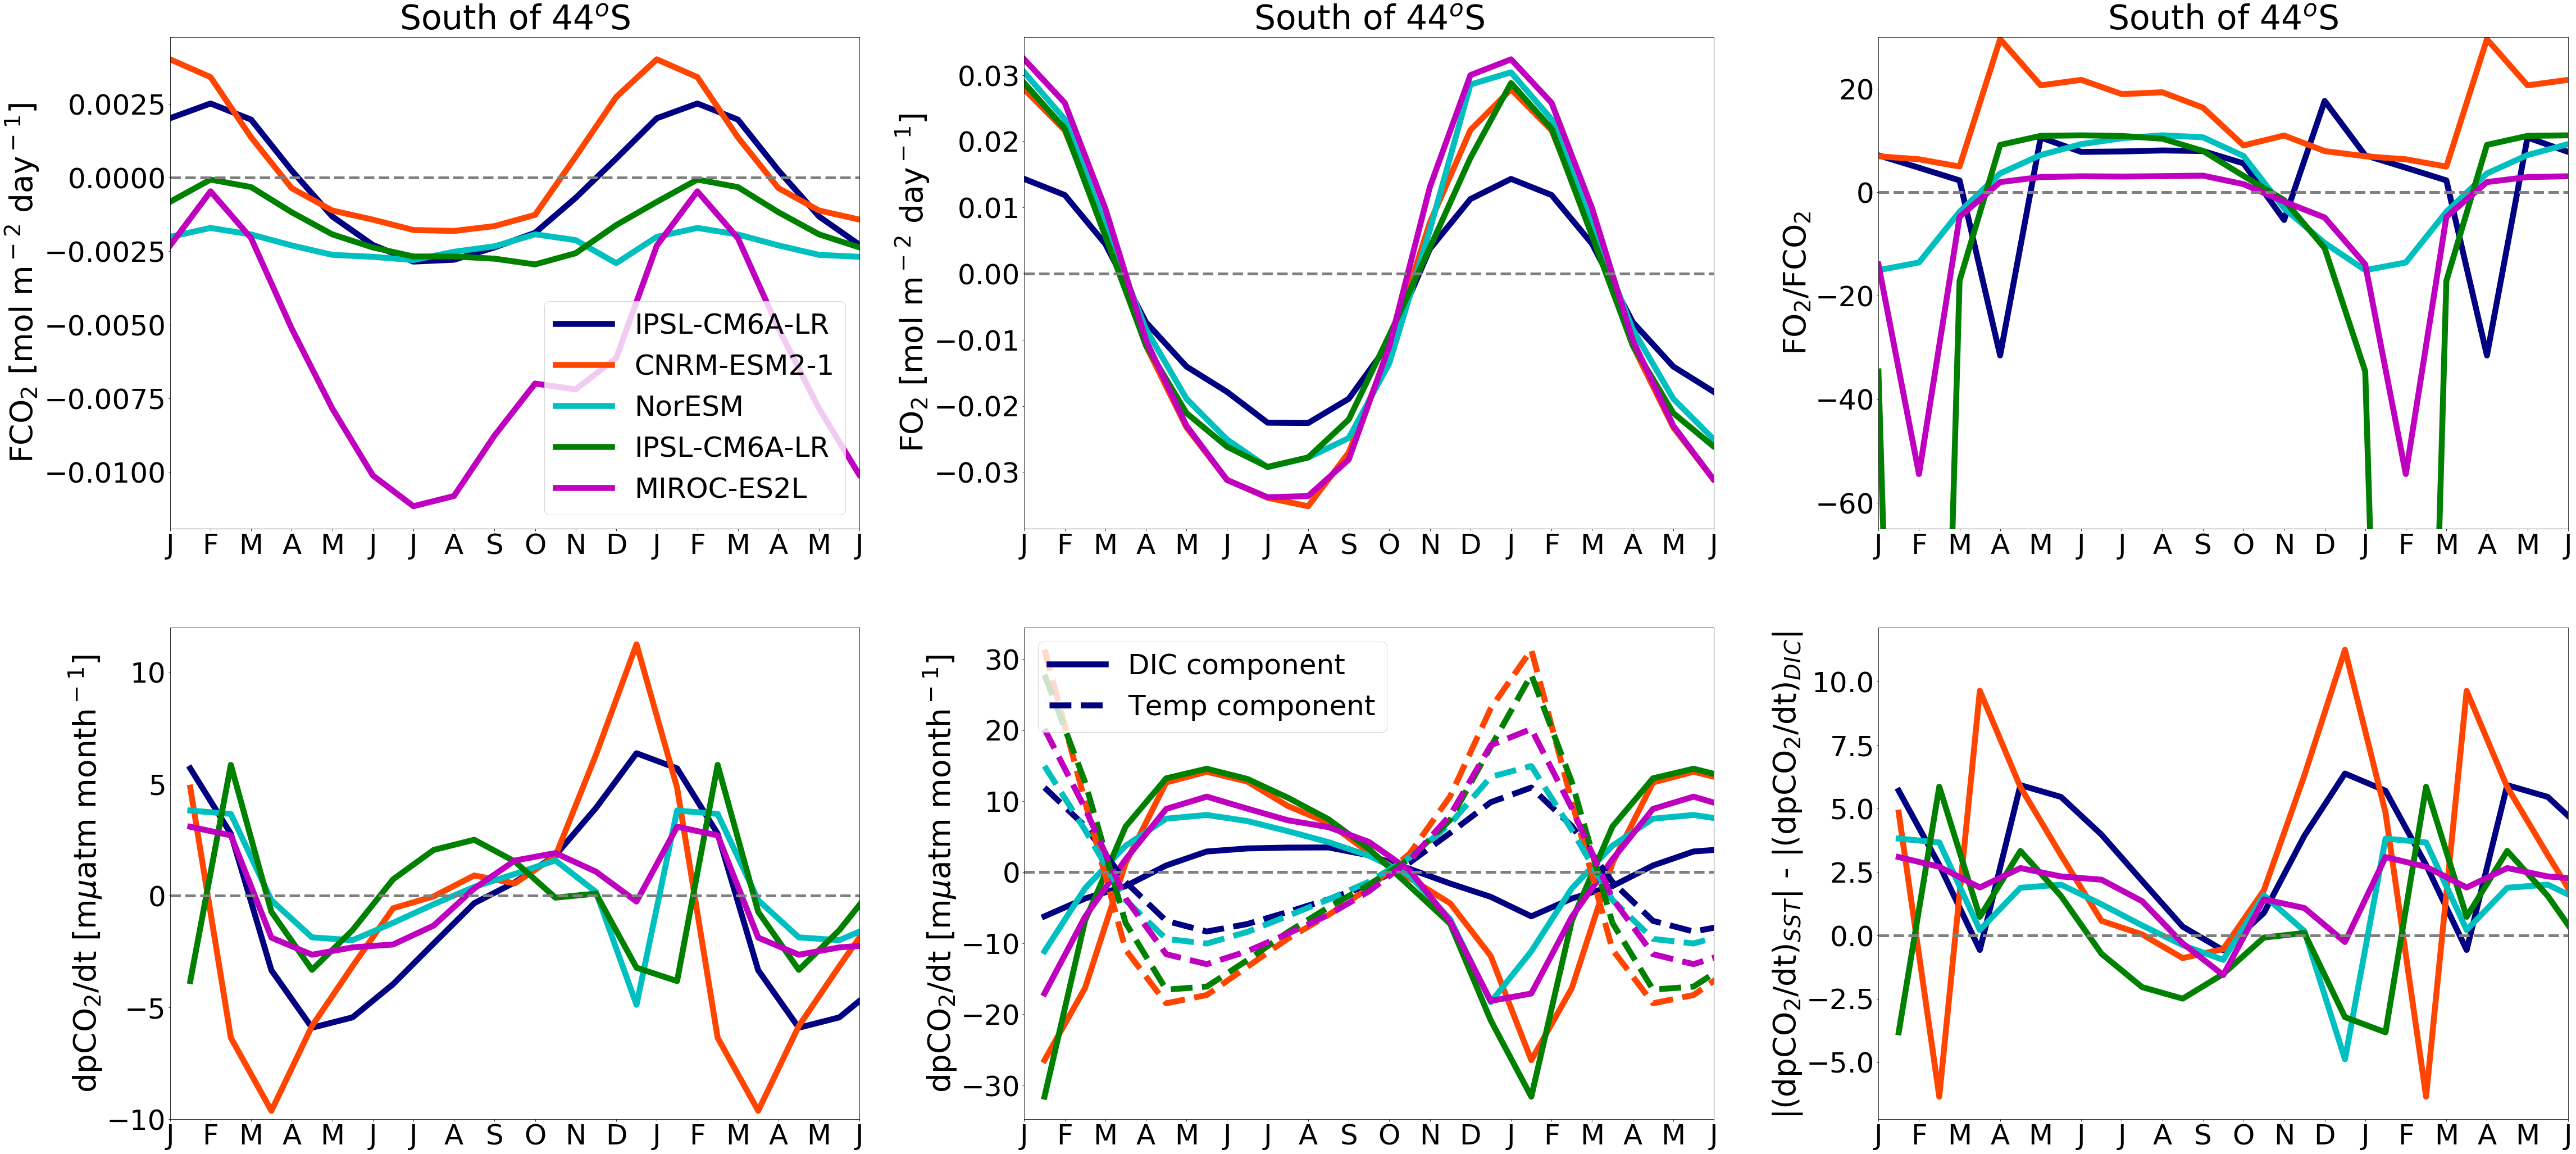

In [54]:
title_font = {'fontname':'Calibri (Body) ', 'size':'80', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}
my_xticks = ['J','F','M','A', 'M','J','J','A','S','O','N','D','J','F','M','A', 'M','J','J','A','S','O','N','D']
my_xticks_b = ['J','F','M','A', 'M','J','J','A','S','O','N','D','J','F','M','A', 'M','J','J','A','S','O','N','D']
plt.figure(figsize=[65,30])
plt.rcParams['font.size'] = 50
plt.rcParams['lines.linewidth'] = 10.5
plt.rcParams['savefig.dpi'] = 200
units_cccma = 12.01/44.01
time = range(23)
time_dt = np.arange(0.5,23,1)
ylfz= 55

lz = 5

time = range(23)


############
subplot(2,3,1)
plot(time,cccma_fgco2_SO_sc,color = 'navy',label = 'IPSL-CM6A-LR')
plot(time,cnrm_fgco2_SO_sc,color = 'orangered',label = 'CNRM-ESM2-1')
plot(time,ncc_fgco2_SO_sc,color = 'c',label = 'NorESM')
plot(time,ipsl_fgco2_SO_sc,color = 'g',label = 'IPSL-CM6A-LR')
plot(time,miroc_fgco2_SO_sc,color = 'm',label = 'MIROC-ES2L')
plt.xticks(time, my_xticks)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
# plt.ylim(-50,45)
plt.title('South of 44$^o$S')
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
plt.legend(loc = 4)
plt.ylabel('FCO$_2$ [mol m$^-$$^2$ day$^-$$^1$]' ,fontsize = ylfz)


subplot(2,3,2)
plot(time,cccma_fgo2_SO_sc,color = 'navy',label = 'IPSL-CM6A-LR')
plot(time,cnrm_fgo2_SO_sc,color = 'orangered',label = 'CNRM-ESM2-1')
plot(time,ncc_fgo2_SO_sc*-1,color = 'c',label = 'NorESM')
plot(time,ipsl_fgo2_SO_sc,color = 'g',label = 'IPSL-CM6A-LR')
plot(time,miroc_fgo2_SO_sc,color = 'm',label = 'MIROC-ES2L')
plt.xticks(time, my_xticks)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
# plt.ylim(-50,45)
plt.xlim(0,17)
plt.title('South of 44$^o$S')
# plt.title('Sub-Antarctic zone')
# plt.legend(loc = 9)
plt.ylabel('FO$_2$ [mol m$^-$$^2$ day$^-$$^1$]',fontsize = ylfz)

subplot(2,3,3)
plot(time,cccma_fgo2_SO_sc/cccma_fgco2_SO_sc,color = 'navy',label = 'IPSL-CM6A-LR')
plot(time,cnrm_fgo2_SO_sc/cnrm_fgco2_SO_sc,color = 'orangered',label = 'CNRM-ESM2-1')
plot(time,ncc_fgo2_SO_sc/(ncc_fgco2_SO_sc*-1),color = 'c',label = 'NorESM')
plot(time,ipsl_fgo2_SO_sc/ipsl_fgco2_SO_sc,color = 'g',label = 'IPSL-CM6A-LR')
plot(time,miroc_fgo2_SO_sc/miroc_fgco2_SO_sc,color = 'm',label = 'MIROC-ES2L')
plt.xticks(time, my_xticks)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
plt.title('South of 44$^o$S')
plt.ylim(-65,30)
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
# plt.legend(loc = 9)
plt.ylabel('FO$_2$/FCO$_2$',fontsize = ylfz)


# ############
subplot(2,3,4)
plot(time_dt,cccma_dpCO2_dt,color = 'navy',label = 'IPSL-CM6A-LR')
plot(time_dt,cnrm_dpCO2_dt,color = 'orangered',label = 'CNRM-ESM2-1')
plot(time_dt,ncc_dpCO2_dt,color = 'c',label = 'NorESM')
plot(time_dt,ipsl_dpCO2_dt,color = 'g',label = 'IPSL-CM6A-LR')
plot(time_dt,miroc_dpCO2_dt,color = 'm',label = 'MIROC-ES2L')
plt.xticks(time, my_xticks_b)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
plt.ylim(-10,12)
# plt.title('South of 44$^o$C')
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
# plt.legend(loc = 1)
plt.ylabel('dpCO$_2$/dt [m$\mu$atm month$^-$$^1$]' ,fontsize = ylfz)

subplot(2,3,5)
plot(time_dt,cccma_DIC_pco2_comp,color = 'navy',label = 'DIC component')
plot(time_dt,cnrm_DIC_pco2_comp,color = 'orangered')
plot(time_dt,ncc_DIC_pco2_comp,color = 'c')
plot(time_dt,ipsl_DIC_pco2_comp,color = 'g')
plot(time_dt,miroc_DIC_pco2_comp,color = 'm')

plot(time_dt,cccma_sst_pco2_comp,'--',color = 'navy',label = 'Temp component')
plot(time_dt,cnrm_sst_pco2_comp,'--',color = 'orangered')
plot(time_dt,ncc_sst_pco2_comp,'--',color = 'c')
plot(time_dt,ipsl_sst_pco2_comp,'--',color = 'g')
plot(time_dt,miroc_sst_pco2_comp,'--',color = 'm')

plt.xticks(time, my_xticks_b)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
# plt.ylim(-50,45)
# plt.title('South of 44$^o$C')
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
plt.legend(loc = 2)
plt.ylabel('dpCO$_2$/dt [m$\mu$atm month$^-$$^1$]' ,fontsize = ylfz)

subplot(2,3,6)
plot(time_dt,abs(cccma_sst_pco2_comp) - abs(cccma_DIC_pco2_comp),color = 'navy',label = 'DIC component')
plot(time_dt,abs(cnrm_sst_pco2_comp) - abs(cnrm_DIC_pco2_comp),color = 'orangered')
plot(time_dt,abs(ncc_sst_pco2_comp) - abs(ncc_DIC_pco2_comp),color = 'c')
plot(time_dt,abs(ipsl_sst_pco2_comp) - abs(ipsl_DIC_pco2_comp),color = 'g')
plot(time_dt,abs(miroc_sst_pco2_comp) - abs(miroc_DIC_pco2_comp),color = 'm')
plt.xticks(time, my_xticks_b)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
# plt.ylim(-50,45)
# plt.title('South of 44$^o$C')
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
# plt.legend(loc = 1)
plt.ylabel('|(dpCO$_2$/dt)$_S$$_S$$_T$| - |(dpCO$_2$/dt)$_D$$_I$$_C$| ' ,fontsize = ylfz)

plt.tight_layout()